In [192]:
import numpy
from PIL import Image

# light polution map

Image.MAX_IMAGE_PIXELS = 725760000
im_showable = Image.open(r'world2016B.png')
im_showable = numpy.array(im_showable)
im_dev = Image.open(r'world2016.png')
im_dev = numpy.vstack([numpy.array(im_dev), numpy.full((120, 43200), 0)])
im_dev = numpy.column_stack((im_dev, numpy.full((16920, 118), 0)))

step_x = 16920 / 141
step_y = 43318 / 361
print(len(im_dev))
print(len(im_dev[0]))

16920
43318


In [193]:
# weather API

import requests

with open('TOKEN.txt') as tok:
    api_id = tok.read()

latitude = 'london'
longitude = 'uk'

home_link = "https://weather.visualcrossing.com/VisualCrossingWebServices" \
            "/rest/services/timeline/"

params = 'cloudcover,'+'conditions,'+'humidity,'+'visibility'
time = '22:00:00'
date = ('2020-03-01', '2020-03-04')

result_call = home_link+latitude+','+longitude+'/'+date[0]+'T'+time+'/'+ \
              date[1]+'T'+time+'/'+'?key='+api_id+\
              '&include=obs%2Cfcst%2Cstats%2Calerts%2Ccurrent%2Chistfcst'+ \
              '&elements='+params


In [194]:
raw = requests.get(result_call)

In [195]:
raw.json()

{'queryCost': 4,
 'latitude': 51.5064,
 'longitude': -0.12721,
 'resolvedAddress': 'London, England, United Kingdom',
 'address': 'london,uk',
 'timezone': 'Europe/London',
 'tzoffset': 0.0,
 'days': [{'humidity': 64.39,
   'cloudcover': 0.2,
   'visibility': 20.6,
   'conditions': 'Rain',
   'normal': {'humidity': [60.2, 74.5, 86.3],
    'cloudcover': [0.1, 23.3, 98.2]}},
  {'humidity': 73.9,
   'cloudcover': 0.3,
   'visibility': 19.5,
   'conditions': 'Rain',
   'normal': {'humidity': [60.7, 73.4, 89.4],
    'cloudcover': [0.1, 24.2, 98.7]}},
  {'humidity': 76.27,
   'cloudcover': 0.2,
   'visibility': 20.2,
   'conditions': 'Rain',
   'normal': {'humidity': [57.9, 72.9, 92.8],
    'cloudcover': [0.2, 27.6, 93.2]}},
  {'humidity': 85.81,
   'cloudcover': 0.6,
   'visibility': 9.6,
   'conditions': 'Rain',
   'normal': {'humidity': [52.5, 73.3, 89.0],
    'cloudcover': [0.3, 26.9, 98.2]}}]}

In [196]:
raw.json()['timezone']

'Europe/London'

In [197]:
average = {'vis' : 0.0, 'cloud' : 0.0, 'hum' : 0.0}
conditions = {}

count = 1
for i in raw.json()['days']:
    
    if i['conditions'] not in conditions:
        conditions[i['conditions']] = 0
    conditions[i['conditions']] += 1
    
    average['vis'] *= (count-1)/count
    average['vis'] += i['visibility']/count
    
    average['cloud'] *= (count-1)/count
    average['cloud'] += i['cloudcover']/count
    
    average['hum'] *= (count-1)/count
    average['hum'] += i['humidity']/count
    
    count += 1
    
print(*map(lambda x: x+': '+str(round(average[x], 4)), average), sep=', ')


vis: 17.475, cloud: 0.325, hum: 75.0925


2819 21583
('<17.80', '<3.8')
200 43318


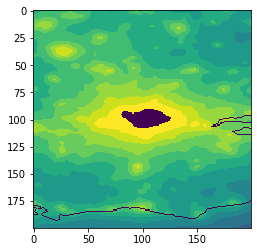

In [198]:
# light polution revealing

dot_x = int(step_x * (75-raw.json()['latitude']))
dot_y = int(step_y * (180+raw.json()['longitude']))
print(dot_x, dot_y)

sqm = ['22.00-21.99', '21.99-21.93', '21.93-21.89', '21.89-21.81',
       '21.81-21.69', '21.69-21.51', '21.51-21.25', '21.25-20.91',
       '20.91-20.49', '20.49-20.02', '20.02-19.50', '19.50-18.95',
       '18.95-18.38', '18.38-17.80', '<17.80']
nelm = ['6.6', '6.6', '6.6', '6.6-6.5', '6.5', '6.5-6.4', '6.4-6.3',
        '6.3-6.1', '6.1-5.8', '5.8-5.5', '5.5-5.1', '5.1-4.7',
        '4.7-4.3', '4.3-3.8', '<3.8']

light_pol = (sqm[im_dev[dot_x][dot_y]], nelm[im_dev[dot_x][dot_y]])
print(light_pol)
import matplotlib.pyplot as plt
%matplotlib inline
memo = im_dev[dot_x-100:dot_x+100]
print(len(memo), len(memo[0]))
plt.imshow(numpy.matrix(im_showable)[dot_x-100:dot_x+100, dot_y-100:dot_y+100])
plt.show()